In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

athlete_event_data = "athlete_events.csv"
athlete_data_df = pd.read_csv(athlete_event_data)
athlete_data_filtered = athlete_data_df[['Team','Year', 'Event','Medal']]

# Filter results to only include results for medalists
medalist_athlete_data = athlete_data_filtered.dropna()
# Filter to include men's marathon medalists
medalist_marathon_data = medalist_athlete_data.loc[medalist_athlete_data['Event'].isin(["Athletics Men's Marathon",
                                                                                    "Athletics Women's Marathon"])]
filtered_marathon_data = medalist_marathon_data.loc[medalist_marathon_data['Team'].isin([
                                                                    'East Germany','Ethiopia','Germany',
                                                                    'Great Britain','Japan','Kenya','United States'
                                                                    ])].replace({'East Germany':'Germany'})

olympic_medalists = pd.DataFrame(filtered_marathon_data)
olympic_medalists.to_csv('olympic_medalists.csv')

In [2]:
olympic_team = olympic_medalists.set_index('Year').sort_index(ascending=True)
                                          
gold_medals = olympic_team[(olympic_team['Medal'] == 'Gold')]
silver_medals = olympic_team[(olympic_team['Medal'] == 'Silver')]
bronze_medals = olympic_team[(olympic_team['Medal'] == 'Bronze')]

gold_medals_country = gold_medals.groupby(['Team']).count()['Medal']
silver_medals_country = silver_medals.groupby(['Team']).count()['Medal']
bronze_medals_country = bronze_medals.groupby(['Team']).count()['Medal']

total_medals_country = olympic_medalists.groupby(['Team']).count()['Medal']

medals_per_country = pd.DataFrame({"Gold":gold_medals_country,
                                "Silver":silver_medals_country,
                                "Bronze":bronze_medals_country,
                                "Total Medals":total_medals_country
                               })
medals_per_country.sort_values('Total Medals', ascending=False)

,Gold,Silver,Bronze,Total Medals
United States,4.0,2.0,7,13
Kenya,3.0,6.0,3,12
Ethiopia,6.0,1.0,4,11
Japan,3.0,3.0,3,9
Great Britain,NaN,4.0,1,5
Germany,2.0,NaN,2,4


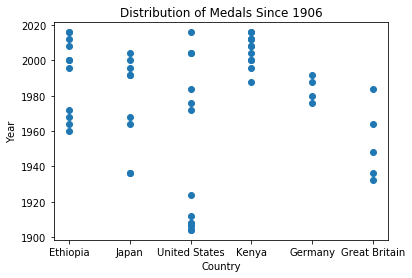

In [15]:
medals_per_year = olympic_medalists[['Team','Year']]

plt.scatter(medals_per_year['Team'], medals_per_year['Year'])
plt.title("Distribution of Medals Since 1906")
plt.ylabel("Year")
plt.xlabel("Country")
plt.savefig('olympics_scatter.png')

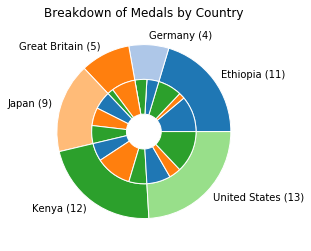

In [22]:
fig, ax = plt.subplots()

size = 0.4
vals = np.array([[6,1,4], [2,0,2], [0,4,1], [3,3,3], [3,6,3], [4,2,7]])
labels = 'Ethiopia (11)', 'Germany (4)', 'Great Britain (5)', 'Japan (9)', 'Kenya (12)', 'United States (13)'

cmap = plt.get_cmap("tab20")
outer_colors = cmap(np.arange(6)*1)
inner_colors = cmap(np.arange(3)*2)

ax.pie(vals.sum(axis=1), radius=1, labels=labels, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
ax.set_title("Breakdown of Medals by Country")

plt.show()
fig.savefig('breakdown_of_medals.png')

In [17]:
# merge all major marathon data

# load all women's data
berlin_women_load = 'Female_Elite_Berlin.csv'
boston_women_load = 'Female_Elite_Boston.csv'
chicago_women_load = 'Female_Elite_Chicago.csv'
london_women_load = 'Female_Elite_London.csv'
new_york_women_load = 'Female_Elite_New_York.csv'
tokyo_women_load = 'Female_Elite_Tokyo.csv'

# read files
berlin_women = pd.read_csv(berlin_women_load, encoding='unicode_escape')
berlin_women = berlin_women.assign(Marathon='Berlin')
berlin_women_df = berlin_women

boston_women = pd.read_csv(boston_women_load)
boston_women = boston_women.assign(Marathon='Boston')
boston_women = boston_women[['Year','Athlete','Country/State','Time','Marathon']]
boston_women = boston_women.rename(columns={'Country/State':'Country'})
boston_women_sorted = boston_women.sort_values('Year', ascending=False)

chicago_women = pd.read_csv(chicago_women_load)
chicago_women = chicago_women.assign(Marathon='Chicago')
chicago_women_sorted = chicago_women.sort_values('Year', ascending=False)

london_women = pd.read_csv(london_women_load, encoding='unicode_escape')
london_women = london_women.assign(Marathon='London')
london_women = london_women[['Year','Athlete', 'Nationality','Time(h:m:s)','Marathon']]
london_women = london_women.rename(columns={'Nationality':'Country','Time(h:m:s)':'Time'})
london_women_sorted = london_women.sort_values('Year', ascending=False)

new_york_women = pd.read_csv(new_york_women_load)
new_york_women = new_york_women.assign(Marathon='New York')
new_york_women = new_york_women[['Year','Winner','Country','Time','Marathon']]
new_york_women = new_york_women.rename(columns={'Winner':'Athlete'})
new_york_women_sorted = new_york_women.sort_values('Year', ascending=False)

tokyo_women = pd.read_csv(tokyo_women_load)
tokyo_women = tokyo_women.assign(Marathon='Tokyo')

# merge files to single data frame
mmdw = pd.concat([boston_women_sorted,new_york_women_sorted,chicago_women_sorted,berlin_women_df,london_women_sorted,tokyo_women])

# export to CSV
mmdw.to_csv('major_marathon_women.csv')
mmdw.head()

,Year,Athlete,Country,Time,Marathon
53,2018,Desi Linden,United States,02:39:54,Boston
52,2017,Edna Kiplagat,Kenya,02:21:52,Boston
51,2016,Atsede Baysa,Ethiopia,02:29:19,Boston
50,2015,Caroline Rotich,Kenya,02:24:55,Boston
49,2014,Buzunesh Deba,Ethiopia,02:19:59,Boston


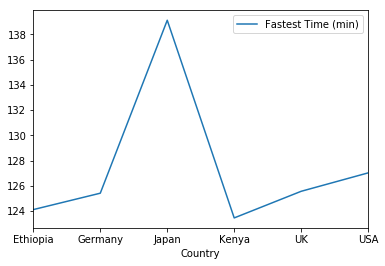

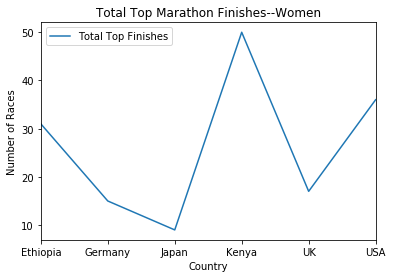

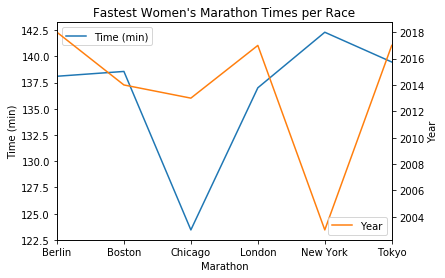

In [23]:
filtered_mmdw = mmdw.loc[mmdw['Country'].isin(['Ethiopia','Germany', 'United Kingdom', 'Japan', 
                                                'Kenya','China','United States'])]
total_races = filtered_mmdw.groupby(['Country']).count()
grouped_year = filtered_mmdw.sort_values('Year', ascending=True)

ethiopia = filtered_mmdw.loc[filtered_mmdw['Country'].isin(['Ethiopia'])].sort_values('Year', ascending=True)
germany = filtered_mmdw.loc[filtered_mmdw['Country'].isin(['Germany'])].sort_values('Time', ascending=True)
japan = filtered_mmdw.loc[filtered_mmdw['Country'].isin(['Japan'])].sort_values('Time', ascending=True)
kenya = filtered_mmdw.loc[filtered_mmdw['Country'].isin(['Kenya'])].sort_values('Time', ascending=True)
uk = filtered_mmdw.loc[filtered_mmdw['Country'].isin(['United Kingdom'])].sort_values('Time', ascending=True)
usa = filtered_mmdw.loc[filtered_mmdw['Country'].isin(['United States'])].sort_values('Time', ascending=True)

fastest_times_per_country = pd.DataFrame({"Country" : ['Ethiopia','Germany','Japan','Kenya','UK','USA'],
                              "Fastest Time (min)" : [124.11,125.41,139.12,123.45,125.56,127.02],
                              "Marathon" : ['Chicago 2014','Chicago 2009','Berlin 2005','Chicago 2013','Chicago 2002','Chicago 2005'],
                              "First Top Finish" : [1997,1992,2000,1994,1981,1966],
                              "Total Top Finishes" : [31,15,9,50,17,36]
                             })
fastest_times_per_country
fastest_times_per_country.plot(x ="Country", y="Fastest Time (min)")
fastest_times_per_country.plot(x ="Country", y="Total Top Finishes")
plt.title("Total Top Marathon Finishes--Women")
plt.ylabel("Number of Races")
fastest_times_per_marathon = pd.DataFrame({"Marathon":["Berlin","Boston","Chicago","London","New York","Tokyo"],
                                          "Time (min)":[138.11,138.57,123.45,137.01,142.31,139.47],
                                          "Country":["Kenya","Kenya","Kenya","Kenya","Kenya","Kenya"],
                                          "Year":[2018,2014,2013,2017,2003,2017]
                                          })

fastest_times_per_marathon.plot(x="Marathon", y="Time (min)", label="Time (min)")
plt.ylabel("Time (min)")

ax2 =fastest_times_per_marathon["Year"].plot(secondary_y=True, label="Year")
ax2.set_ylabel("Year")
ax2.legend(loc="lower right")

plt.title("Fastest Women's Marathon Times per Race")

plt.savefig('fastest_times_women.png')

In [24]:
# load all men's data
berlin_men_load = 'Male_Elite_Berlin.csv'
boston_men_load = 'Male_Elite_Boston.csv'
chicago_men_load = 'Male_Elite_Chicago.csv'
london_men_load = 'Male_Elite_London.csv'
new_york_men_load = 'Male_Elite_New_York.csv'
tokyo_men_load = 'Male_Elite_Tokyo.csv'

# read files
berlin_men = pd.read_csv(berlin_men_load, encoding='unicode_escape')
berlin_men = berlin_men.assign(Marathon='Berlin')

boston_men = pd.read_csv(boston_men_load)
boston_men = boston_men.assign(Marathon='Boston')
boston_men = boston_men[['Year','Athlete','Country/State or Province','Time','Marathon']]
boston_men = boston_men.rename(columns={'Country/State or Province':'Country'})
boston_men_sorted = boston_men.sort_values('Year', ascending=False)

chicago_men = pd.read_csv(chicago_men_load, encoding='unicode_escape')
chicago_men = chicago_men.assign(Marathon='Chicago')
chicago_men_sorted = chicago_men.sort_values('Year', ascending=False)

london_men = pd.read_csv(london_men_load, encoding='unicode_escape')
london_men = london_men.assign(Marathon='London')
london_men = london_men[['Year','Athlete', 'Nationality','Time(h:m:s)','Marathon']]
london_men = london_men.rename(columns={'Nationality':'Country','Time(h:m:s)':'Time'})
london_men_sorted = london_men.sort_values('Year', ascending=False)

new_york_men = pd.read_csv(new_york_men_load, encoding='unicode_escape')
new_york_men = new_york_men.assign(Marathon='New York')
new_york_men = new_york_men[['Year','Winner','Country','Time','Marathon']]
new_york_men = new_york_men.rename(columns={'Winner':'Athlete'})
new_york_men_sorted = new_york_men.sort_values('Year', ascending=False)

tokyo_men = pd.read_csv(tokyo_men_load, encoding='unicode_escape')
tokyo_men = tokyo_men.assign(Marathon='Tokyo')

# merge files to single data frame
mmdm = pd.concat([boston_men_sorted,new_york_men_sorted,chicago_men_sorted,berlin_men,london_men_sorted,tokyo_men])

# export to CSV
mmdm.to_csv('major_marathon_men.csv')
mmdm.head()

,Year,Athlete,Country,Time,Marathon
121,2018,Yuki Kawauchi,Japan,02:15:58,Boston
120,2017,Geoffrey Kirui,Kenya,02:09:37,Boston
119,2016,Berhanu Hayle,Ethiopia,02:12:45,Boston
118,2015,Desisa Benti,Ethiopia,02:09:17,Boston
117,2014,Meb Keflezighi,United States,02:08:37,Boston


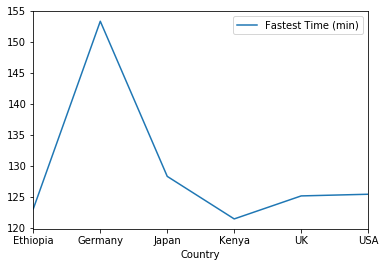

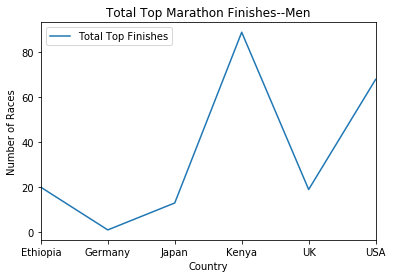

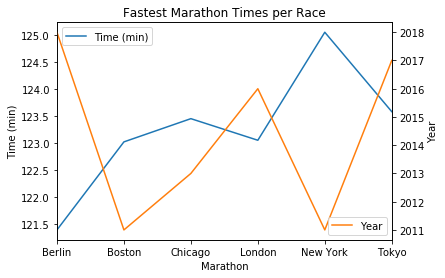

In [25]:
filtered_mmdm = mmdm.loc[mmdm['Country'].isin(['Ethiopia','Germany', 'United Kingdom', 'Japan', 
                                                'Kenya','United States'])]
total_races2 = filtered_mmdm.groupby(['Marathon'])
grouped_year2 = filtered_mmdm.sort_values('Time', ascending=True)

ethiopia_men = filtered_mmdm.loc[filtered_mmdm['Country'].isin(['Ethiopia'])].sort_values('Year', ascending=True)
germany_men = filtered_mmdm.loc[filtered_mmdm['Country'].isin(['Germany'])].sort_values('Year', ascending=True)
japan_men = filtered_mmdm.loc[filtered_mmdm['Country'].isin(['Japan'])].sort_values('Year', ascending=True)
kenya_men = filtered_mmdm.loc[filtered_mmdm['Country'].isin(['Kenya'])].sort_values('Year', ascending=True)
uk_men = filtered_mmdm.loc[filtered_mmdm['Country'].isin(['United Kingdom'])].sort_values('Time', ascending=True)
usa_men = filtered_mmdm.loc[filtered_mmdm['Country'].isin(['United States'])].sort_values('Year', ascending=True)

mens_times_per_country = pd.DataFrame({"Country" : ['Ethiopia','Germany','Japan','Kenya','UK','USA'],
                              "Fastest Time (min)" : [123.03,153.36,128.27,121.39,125.11,125.38],
                              "Marathon" : ['Berlin 2016','Boston 1932','Chicago 1986','Berlin 2018','Chicago 2018','London 2002'],
                              "First Top Finish" : [1989,1932,1951,1983,1970,1897],
                              "Total Top Finishes" : [20,1,13,89,19,68]
                             })
mens_times_per_country
mens_times_per_country.plot(x ="Country", y="Fastest Time (min)")
mens_times_per_country.plot(x ="Country", y="Total Top Finishes")
plt.title("Total Top Marathon Finishes--Men")
plt.ylabel("Number of Races")
mens_times_per_marathon = pd.DataFrame({"Marathon":["Berlin","Boston","Chicago","London","New York","Tokyo"],
                                          "Time (min)":[121.39,123.02,123.45,123.05,125.05,123.58],
                                          "Country":["Kenya","Kenya","Kenya","Kenya","Kenya","Kenya"],
                                          "Year":[2018,2011,2013,2016,2011,2017]
                                          })

mens_times_per_marathon.plot(x="Marathon", y="Time (min)", label="Time (min)")
plt.ylabel("Time (min)")

m_ax2 = mens_times_per_marathon["Year"].plot(secondary_y=True, label="Year")
m_ax2.set_ylabel("Year")
m_ax2.legend(loc="lower right")

plt.title("Fastest Marathon Times per Race")

plt.savefig('fastest_times_men.png')